# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!

## Exercise: Bar Charts and Heatmaps

### Step 0: Import libraries and read zipfile content

In [2]:
import zipfile as zfm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dir(zfm.ZipFile)
with zfm.ZipFile('DataToVisualize.zip') as zf:
    # datasets = zf.infolist()
    datasets = zf.namelist()
    # datasets = zf.getinfo(name='fifa.csv')
datasets

['cancer.csv',
 'cancer_b.csv',
 'cancer_m.csv',
 'candy.csv',
 'fifa.csv',
 'flight_delays.csv',
 'ign_scores.csv',
 'insurance.csv',
 'iris.csv',
 'iris_setosa.csv',
 'iris_versicolor.csv',
 'iris_virginica.csv',
 'museum_visitors.csv',
 'spotify.csv']

### Step 1: Load and review the data
- into a pandas DataFrame (df)
- we'll use museum_visitors.csv dataset

In [14]:
with zfm.ZipFile('DataToVisualize.zip') as zf:
    df = pd.read_csv(zf.open('ign_scores.csv'), index_col='Platform')
print(df.shape)
df.iloc[[0, 3, 9 , -1], :]

(21, 12)


,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
PlayStation,6.016406,7.933333,6.313725,6.553731,6.579070,6.757895,7.910000,6.773387,6.424000,6.918182,6.751220,6.496875
iPhone,6.865445,7.764286,7.745833,6.087500,7.471930,7.810784,7.185185,7.315789,6.995588,7.328571,7.152174,7.534921


In [47]:
#df.index
df.loc[['PC', 'PlayStation Vita'], :]
print(df.loc['PC'].max())
print(df.loc['PlayStation Vita'].min())
df.loc['PlayStation Vita'].sort_values().index[0]

7.759930313588847
5.725


'Simulation'

In [46]:
# Fill in the line below: What is the highest average score received by PC games,
# for any genre?
high_score = df.loc['PC'].max()

# Fill in the line below: On the Playstation Vita platform, which genre has the 
# lowest average score? Please provide the name of the column, and put your answer 
# in single quotes (e.g., 'Action', 'Adventure', 'Fighting', etc.)
worst_genre = df.loc['PlayStation Vita'].sort_values().index[0]

### Step 3: Which platform is best?
#### Part A
Create a bar chart that shows the average score for racing games, for each platform. 

<Axes: xlabel='Platform', ylabel='Racing'>

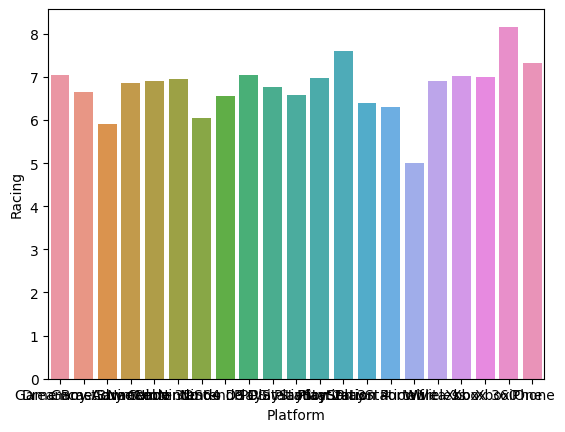

In [49]:
# Bar chart showing average score for racing games by platform
sns.barplot(x=df.index, y=df.Racing)


Text(0.5, 1.0, 'Average score for racing games for each platform')

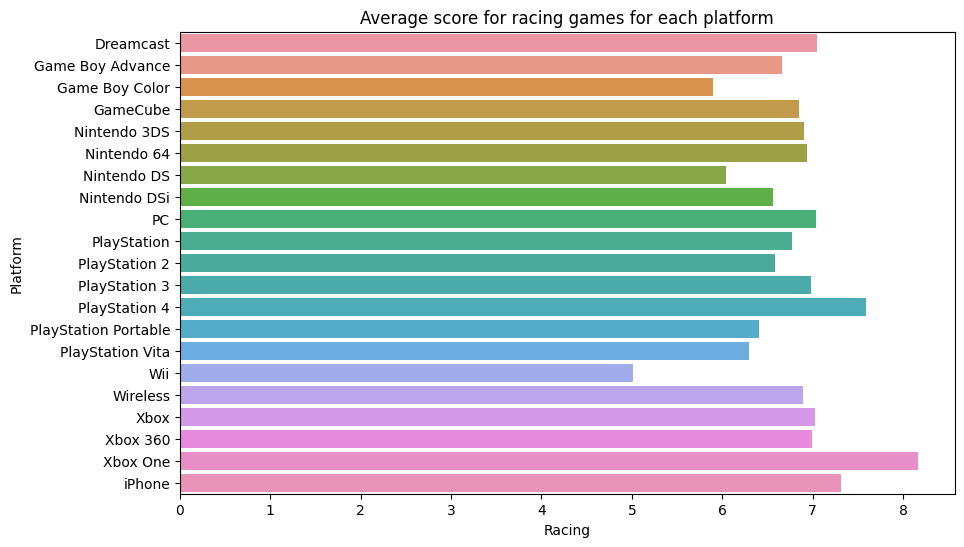

In [52]:
### Better interchange x & y axis
fig, axbar = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.Racing, y=df.index, ax=axbar)
axbar.set_title('Average score for racing games for each platform')

#### Part B

Based on the bar chart, do you expect a racing game for the Wii platform to receive a high rating? If not, what gaming platform seems to be the best alternative?

__Solution:__ Based on the data, we should not expect a racing game for the Wii platform to receive a high rating. In fact, on average, racing games for Wii score lower than any other platform. Xbox One seems to be the best alternative, since it has the highest average ratings.



### Step 4: All possible combinations!
#### part A - heatmap

Text(0.5, 80.7222222222222, 'Genre')

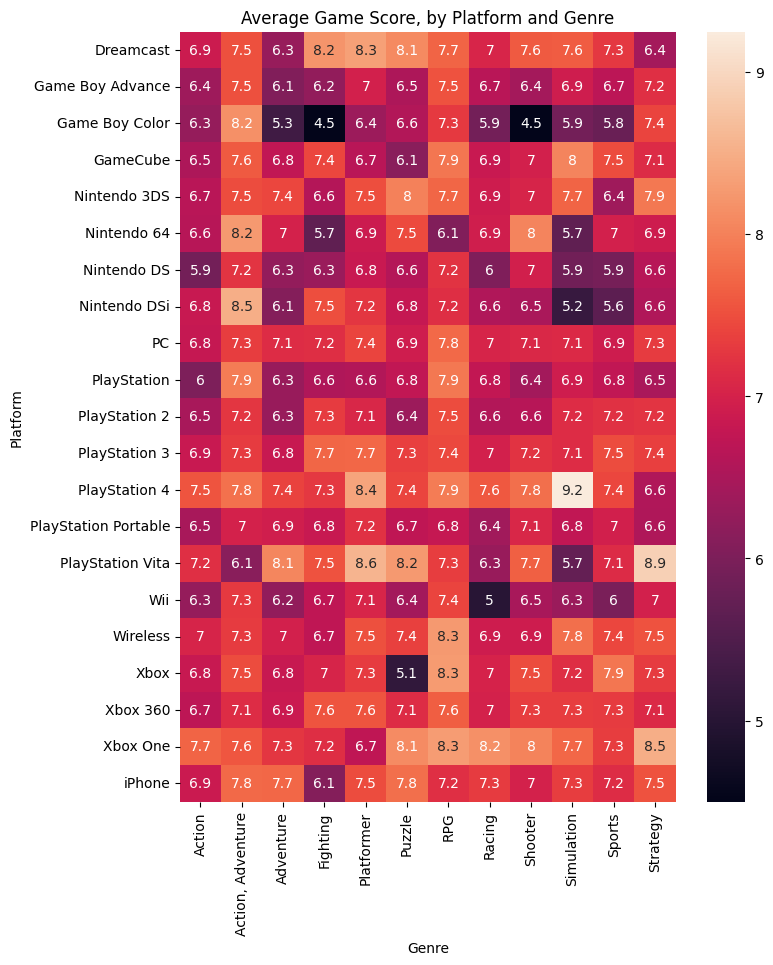

In [61]:
# Heatmap showing average game score by platform and genre
fig, axheat = plt.subplots(figsize=(8,10))
sns.heatmap(data=df, annot=True, ax=axheat)
axheat.set_title('Average Game Score, by Platform and Genre')
axheat.set_xlabel('Genre')

#### Part B

Which combination of genre and platform receives the highest average ratings? Which combination receives the lowest average rankings?

Hint: To find the highest average ratings, look for the largest numbers (or lightest boxes) in the heatmap. To find the lowest average ratings, find the smallest numbers (or darkest boxes).

Solution: Simulation games for Playstation 4 receive the highest average ratings (9.2). Shooting and Fighting games for Game Boy Color receive the lowest average rankings (4.5).



In [69]:
df.max().max()
df.min().min()
df.max().sort_values().index[-1]

'Simulation'